In [1]:
# import all the required libraries
import numpy as np
import pandas as pd

In [13]:
import warnings
warnings.filterwarnings('ignore')
colnames = ['UserID','Gender','Age','Occupation','Zip-code']
user_df = pd.read_csv('users.dat', sep= "::", names = colnames)

In [15]:
user_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [20]:
colnames1 = ['UserID','MovieID','Rating','Timestamp']
rating_df = pd.read_csv('ratings.dat',sep='::',names=colnames1)

In [22]:
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [25]:
colnames2 = ['MovieID','Title','Genres']
movies_df = pd.read_csv('movies.dat',sep='::',names=colnames2,engine='python',encoding='latin-1')
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
user_df.shape

(6040, 5)

In [27]:
rating_df.shape

(1000209, 4)

In [28]:
movies_df.shape

(3883, 3)

# creating master data set

In [30]:
# merge two data_sets on MovieID
df = rating_df.merge(movies_df, how = 'inner', on = 'MovieID')
df

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [31]:
master_data = df.merge(user_df, how = 'inner', on = 'UserID') 

In [32]:
master_data

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


In [33]:
master_data.size

10002090

In [34]:
master_data.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# 2. Exploring data visually

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

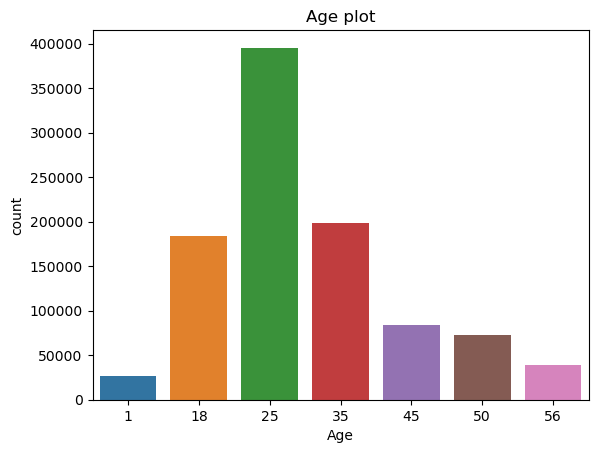

In [43]:
sns.countplot(x=master_data['Age'])
plt.title('Age plot')
plt.show()

In [46]:
# user rating for toy story
toy_story = master_data[master_data['Title'].str.contains('Toy Story')]

In [47]:
toy_story

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067
50,1,3114,4,978302174,Toy Story 2 (1999),Animation|Children's|Comedy,F,1,10,48067
417,17,3114,5,978159386,Toy Story 2 (1999),Animation|Children's|Comedy,M,50,1,95350
634,18,1,4,978154768,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825
938,19,1,5,978555994,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073
...,...,...,...,...,...,...,...,...,...,...
994256,1025,3114,5,975002777,Toy Story 2 (1999),Animation|Children's|Comedy,M,25,16,34677
994289,1898,3114,5,974699028,Toy Story 2 (1999),Animation|Children's|Comedy,M,25,12,91101
994315,1970,3114,4,974686535,Toy Story 2 (1999),Animation|Children's|Comedy,M,50,13,89052
994367,4741,3114,4,963267233,Toy Story 2 (1999),Animation|Children's|Comedy,M,35,7,15203


In [50]:
toy_story.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

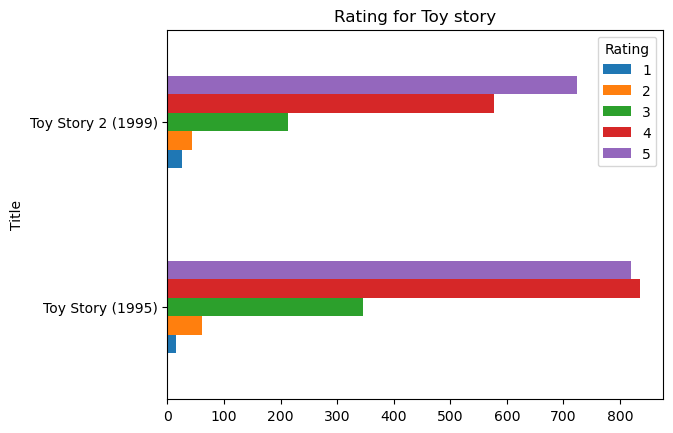

In [51]:
toy_story.groupby(['Title','Rating']).size().unstack().plot(kind='barh', legend='True')
plt.title('Rating for Toy story')
plt.show()

In [65]:
# top 25 movies by viewers
top_25 = master_data.groupby('Title')
top_25 = top_25.size().sort_values(ascending=False)[:25]

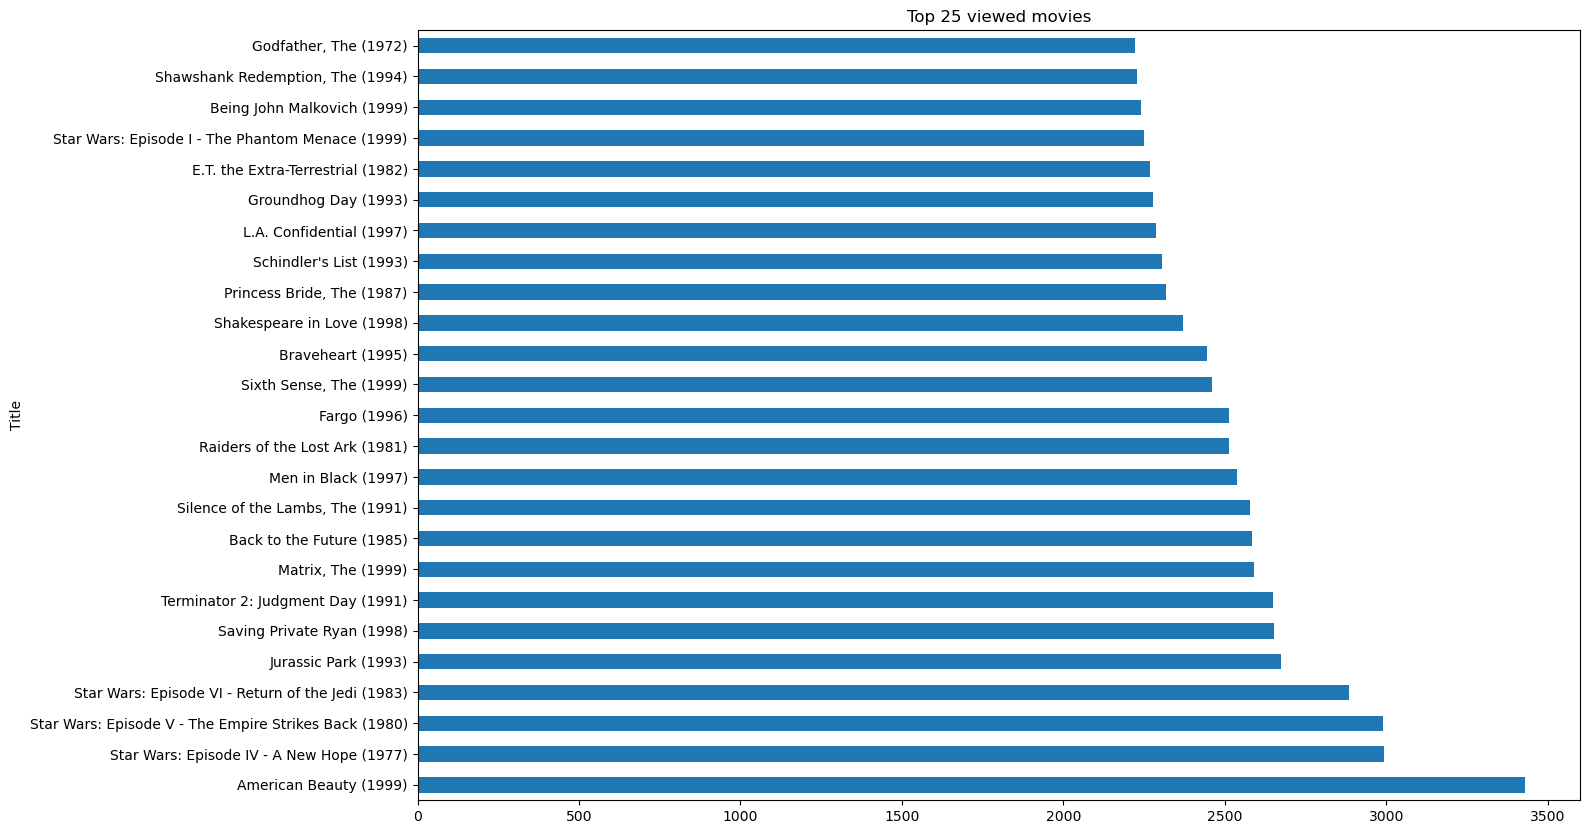

In [70]:
plt.figure(figsize=(15,10))
top_25.plot(kind='barh')
plt.title('Top 25 viewed movies')
plt.show()

In [71]:
my_id=master_data[master_data['UserID']==2696]

In [78]:
my_id

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
953847,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi,M,25,7,24210
953848,2696,1097,3,973308690,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,M,25,7,24210
953849,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,M,25,7,24210
953850,2696,800,5,973308842,Lone Star (1996),Drama|Mystery,M,25,7,24210
953851,2696,3386,1,973308842,JFK (1991),Drama|Mystery,M,25,7,24210
953852,2696,3176,4,973308865,"Talented Mr. Ripley, The (1999)",Drama|Mystery|Thriller,M,25,7,24210
953853,2696,1711,4,973308904,Midnight in the Garden of Good and Evil (1997),Comedy|Crime|Drama|Mystery,M,25,7,24210
953854,2696,1589,3,973308865,Cop Land (1997),Crime|Drama|Mystery,M,25,7,24210
953855,2696,1783,4,973308865,Palmetto (1998),Film-Noir|Mystery|Thriller,M,25,7,24210
953856,2696,1892,4,973308904,"Perfect Murder, A (1998)",Mystery|Thriller,M,25,7,24210


In [86]:
rate = my_id.set_index(my_id['Title'])['Rating']
rate

Title
Back to the Future (1985)                         2
E.T. the Extra-Terrestrial (1982)                 3
L.A. Confidential (1997)                          4
Lone Star (1996)                                  5
JFK (1991)                                        1
Talented Mr. Ripley, The (1999)                   4
Midnight in the Garden of Good and Evil (1997)    4
Cop Land (1997)                                   3
Palmetto (1998)                                   4
Perfect Murder, A (1998)                          4
Game, The (1997)                                  4
I Know What You Did Last Summer (1997)            2
Devil's Advocate, The (1997)                      4
Psycho (1998)                                     4
Wild Things (1998)                                4
Basic Instinct (1992)                             4
Lake Placid (1999)                                1
Shining, The (1980)                               4
I Still Know What You Did Last Summer (1998)      2
Client

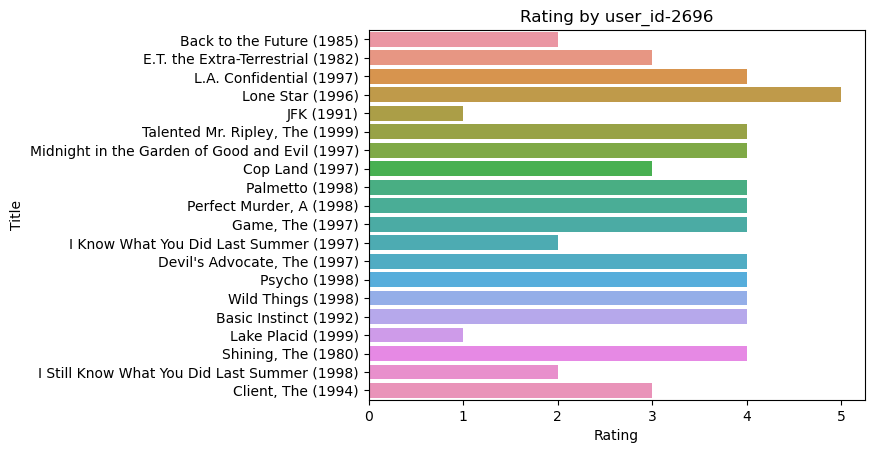

In [82]:
sns.barplot(x=my_id.Rating,y=my_id.Title)
plt.title('Rating by user_id-2696')
plt.show()

# Feature Engineering

In [96]:
df_genre = master_data['Genres']
df_genre = df_genre.str.split('|')

In [100]:
se1 = set()
for i in df_genre:
    se1.update(i)

In [103]:
se1
print(f'unique genres: {len(se1)}')

unique genres: 18


In [104]:
# 2. creating sepearate column for each genre category with a hot_encoding

In [107]:
genreonehot = master_data['Genres'].str.get_dummies('|')
genreonehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
master_data1 = master_data.copy()
master_data1 = pd.concat([master_data,genreonehot], axis=1)

In [114]:
master_data1

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662,...,0,0,0,0,0,0,0,0,0,0
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662,...,0,0,0,0,0,0,0,0,0,1
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662,...,0,0,1,0,0,0,0,0,0,0
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662,...,0,0,0,0,0,0,0,0,1,0


In [116]:
master_data1.shape

(1000209, 28)

In [118]:
Genderonehot = master_data1['Gender'].str.get_dummies('|')

In [119]:
Genderonehot.head()

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [120]:
master_data2 = pd.concat([master_data1,Genderonehot],axis=1)

In [121]:
master_data2

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,...,0,1,0,0,0,0,0,0,1,0
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,...,0,1,0,1,0,0,0,0,1,0
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662,...,0,0,0,0,0,0,0,0,0,1
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662,...,0,0,0,0,0,0,0,1,0,1
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662,...,1,0,0,0,0,0,0,0,0,1
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662,...,0,0,0,0,0,0,1,0,0,1


In [122]:
master_data2.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'F', 'M'],
      dtype='object')

In [123]:
X = master_data2[['MovieID','Age','Occupation','F','M']].values

In [124]:
Y = master_data2['Rating'].values

In [125]:
X

array([[1193,    1,   10,    1,    0],
       [ 661,    1,   10,    1,    0],
       [ 914,    1,   10,    1,    0],
       ...,
       [3840,   45,    5,    0,    1],
       [3766,   45,    5,    0,    1],
       [3834,   45,    5,    0,    1]], dtype=int64)

In [126]:
Y

array([5, 3, 3, ..., 4, 2, 2], dtype=int64)

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [131]:
from sklearn.linear_model import LinearRegression
LG = LinearRegression()
LG.fit(X_train,y_train)

LinearRegression()

In [132]:
y_pred = LG.predict(X_test)

In [134]:
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error

In [139]:
mas = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [140]:
print(f'Mean Absolute error: {mas}')
print(f'Mean squared error: {mse}')
print(f'Root Mean square error: {rmse}')

Mean Absolute error: 0.00796492177053243
Mean squared error: 1.2362090746922196
Root Mean square error: 1.111849393889397
